# Semi-Supervised VAE Project

## By VAEGen

### Imports

In [1]:
from plotting import plot_64_m1, plot_64_m2, plot_loss_m1,plot_loss_m2, plot_interpolation, make_cm
from models import M1, M2
from training import run_epochs
from datasets import importMNIST, importFashionMNIST
from loaders import create_loader, create_subset
from classifiers import kneighbors_classifier
import torch

In [2]:
## Settings
batch_size = 512
epochs = 2
latent_dim = 8
learning_rate = 1e-3
image_channels = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NNprint_ = False
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)

In [3]:
## Initial Values
model = None
dset_train = None
dset_test = None
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [4]:
## Picking mode and dataset
mode = input("Pick mode? (vae/m1/m2) ")
dataset = input("Pick dataset (mnist/fashion) ")

Pick mode? (vae/m1/m2) m1
Pick dataset (mnist/fashion) mnist


In [5]:
if dataset == "mnist":
    dset_train, dset_test = importMNIST()
elif dataset == "fashion":
    dset_train, dset_test = importFashionMNIST()
else:
    print("Unknown dataset")
    exit()

100.1%

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


113.5%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


100.4%

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


180.4%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/home/slangen/Documents/deep/lib/python3.6/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
## Creating Loaders
train_loader = create_loader(dset_train,batch_size)
test_loader = create_loader(dset_test,batch_size)
print(device)

cuda


Epoch 1 of 2
	 Training ...


/home/slangen/Documents/deep/lib/python3.6/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


	 Testing ...
Train ELBO: -219.1846
Val ELBO: -167.2143
Epoch 2 of 2
	 Training ...
	 Testing ...
Train ELBO: -134.1589
Val ELBO: -107.2868


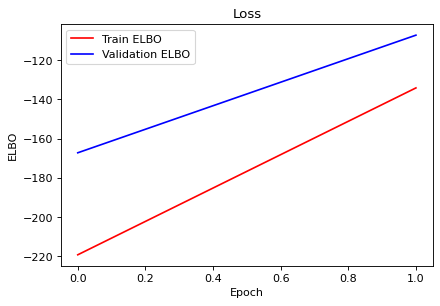

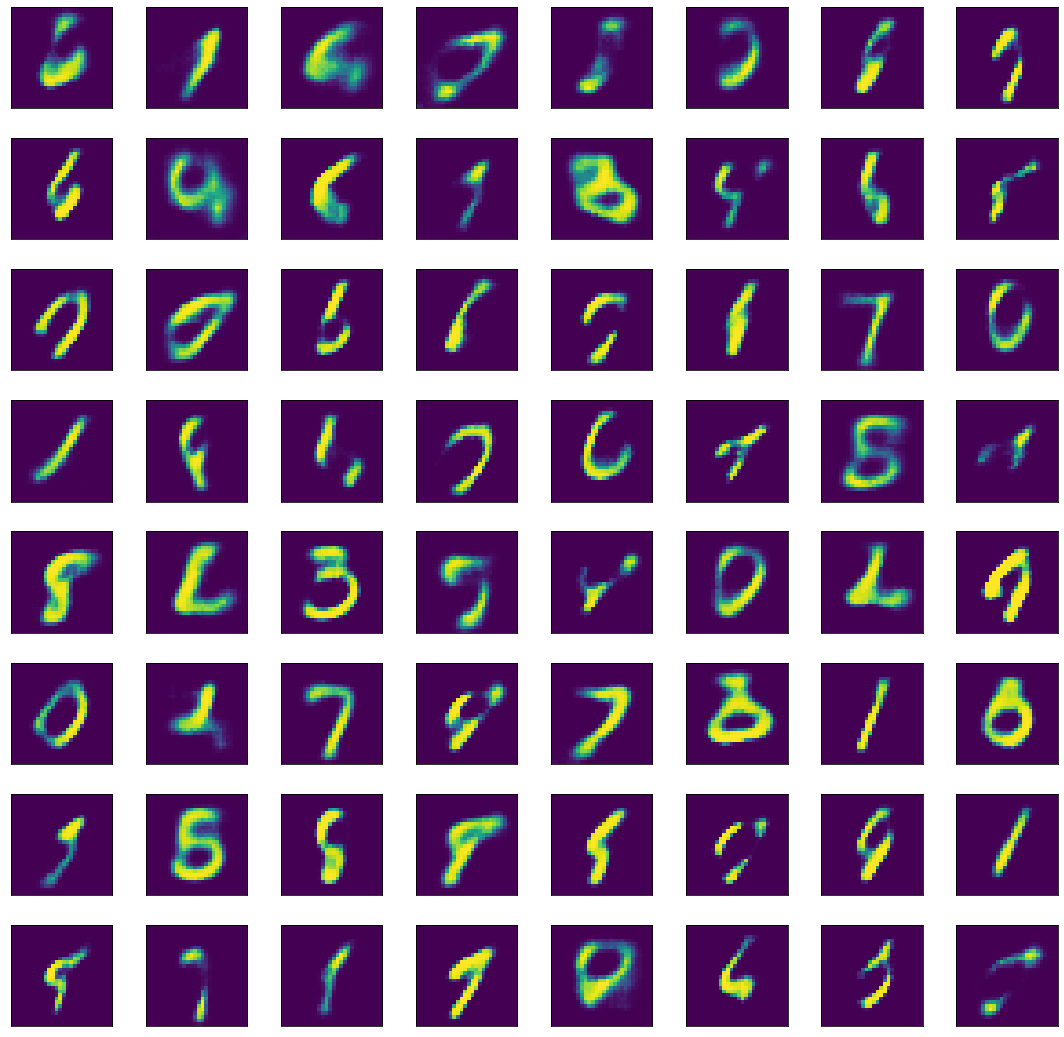

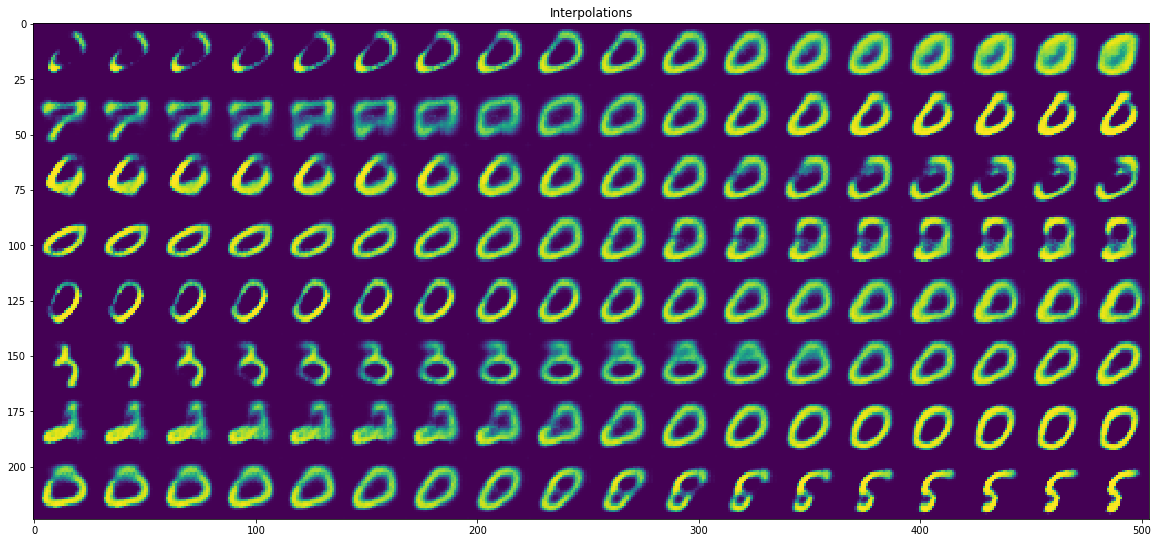

NameError: name 'get_target_indexes' is not defined

In [7]:
if mode=="vae":
    print("vae")
elif mode=="m1":
    # define model and optimizer
    model = M1(device, image_channels=1, h_dim=1024, z_dim=latent_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # train network
    train_loss,test_loss = run_epochs(mode, model, optimizer, epochs, train_loader, test_loader, train_loss, test_loss)

    # plot loss
    plot_loss_m1(train_loss,test_loss)

    # plot reconstructions
    plot_64_m1(model=model,sample=True)

    # sample model and plot interpolations
    z_in=model.sample(batch_size=10000,z_out=True)
    plot_interpolation(model, z_in=z_in,image_n=0,latent_dim=latent_dim,imsize=28,interpolate_dim=18,std_=3,batch_size=10000)

    # classifier
    kneighbors_classifier(model,dset_train, dset_test, classes)
